In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('income.csv')

In [3]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
df.shape

(22, 3)

Text(0, 0.5, 'Income($)')

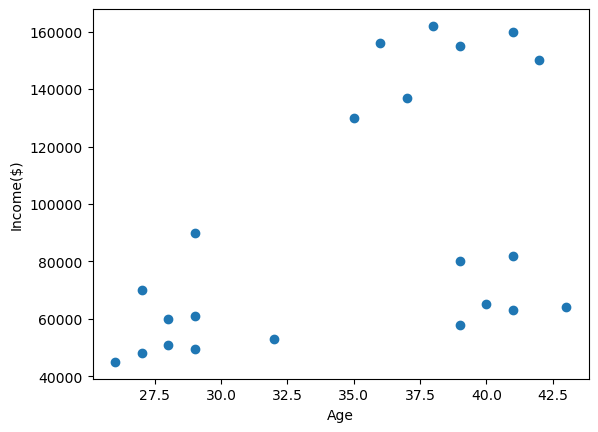

In [5]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [6]:
km = KMeans(n_clusters = 2)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [8]:
km.cluster_centers_

array([[3.32000000e+01, 6.26333333e+04],
       [3.82857143e+01, 1.50000000e+05]])

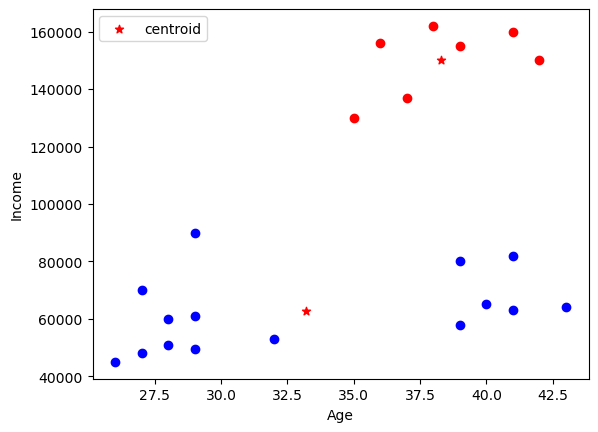

In [9]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]

plt.scatter(df1.Age,df1['Income($)'],color='blue')
plt.scatter(df2.Age,df2['Income($)'],color='red')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'red',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

### Elbow Plot

In [10]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

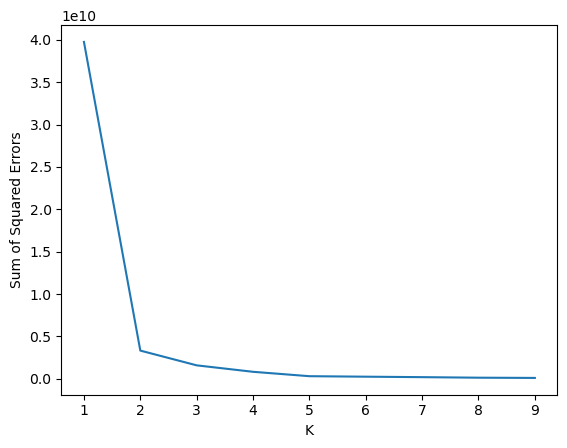

In [12]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Errors')
plt.plot(k_rng,sse)
plt.show()